# Student Loan Risk with Deep Learning

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from pathlib import Path

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `student-loans.csv` file into a Pandas DataFrame. Review the DataFrame, looking for columns that could eventually define your features and target variables.   

In [2]:
# Read the csv into a Pandas DataFrame
file_path = "https://static.bc-edx.com/ai/ail-v-1-0/m18/lms/datasets/student-loans.csv"
loans_df = pd.read_csv(file_path)

# Review the DataFrame
loans_df.head()

,payment_history,location_parameter,stem_degree_score,gpa_ranking,alumni_success,study_major_code,time_to_completion,finance_workshop_score,cohort_ranking,total_loan_score,financial_aid_score,credit_ranking
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [3]:
# Review the data types associated with the columns
loans_df.dtypes

payment_history           float64
location_parameter        float64
stem_degree_score         float64
gpa_ranking               float64
alumni_success            float64
study_major_code          float64
time_to_completion        float64
finance_workshop_score    float64
cohort_ranking            float64
total_loan_score          float64
financial_aid_score       float64
credit_ranking              int64
dtype: object

In [4]:
# Review dataframe information to further analyze dataset
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   payment_history         1599 non-null   float64
 1   location_parameter      1599 non-null   float64
 2   stem_degree_score       1599 non-null   float64
 3   gpa_ranking             1599 non-null   float64
 4   alumni_success          1599 non-null   float64
 5   study_major_code        1599 non-null   float64
 6   time_to_completion      1599 non-null   float64
 7   finance_workshop_score  1599 non-null   float64
 8   cohort_ranking          1599 non-null   float64
 9   total_loan_score        1599 non-null   float64
 10  financial_aid_score     1599 non-null   float64
 11  credit_ranking          1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Check the credit_ranking value counts
loans_df["credit_ranking"].value_counts()

credit_ranking
1    855
0    744
Name: count, dtype: int64

### Step 2: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “credit_ranking”. The remaining columns should define the features dataset.

In [6]:
# Step 2: Prepare the target variable `y`

# Define the target set `y` using the 'credit_ranking' column
# This column represents the likelihood of loan repayment (our prediction target)
y = loans_df['credit_ranking'].to_numpy()

# Display a sample of the target array to verify data
# Using NumPy's random choice for displaying random values from the array

print(y[:10])



[0 0 0 1 0 0 0 1 1 0]


In [7]:
# Define the features set `X` by selecting all columns except 'credit_ranking'
# The 'credit_ranking' column is the target variable and should not be included in the features set
X = loans_df.drop(columns=['credit_ranking'])

# Review the features DataFrame
# Display the first few rows of the features dataset to verify it contains the correct columns
X.head()

# Display information about the features DataFrame
# This helps confirm data types, column names, and the number of non-null entries for each feature
print("\nFeatures DataFrame information:")
X.info()



Features DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   payment_history         1599 non-null   float64
 1   location_parameter      1599 non-null   float64
 2   stem_degree_score       1599 non-null   float64
 3   gpa_ranking             1599 non-null   float64
 4   alumni_success          1599 non-null   float64
 5   study_major_code        1599 non-null   float64
 6   time_to_completion      1599 non-null   float64
 7   finance_workshop_score  1599 non-null   float64
 8   cohort_ranking          1599 non-null   float64
 9   total_loan_score        1599 non-null   float64
 10  financial_aid_score     1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


### Step 3: Split the features and target sets into training and testing datasets.


In [8]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1

### Step 3: Split the features and target sets into training and testing datasets

# Split the data into training and testing sets
# Use 80% of the data for training and 20% for testing
# Set random_state=1 to ensure reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Display the shapes of the training and testing datasets for verification
print("Training feature set shape:", X_train.shape)
print("Testing feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Testing target set shape:", y_test.shape)




Training feature set shape: (1279, 11)
Testing feature set shape: (320, 11)
Training target set shape: (1279,)
Testing target set shape: (320,)


### Step 4: Use scikit-learn's `StandardScaler` to scale the features data.

In [9]:
### Step 4: Use scikit-learn's StandardScaler to scale the features data

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training features and transform them
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Display a sample of the scaled training data to verify the scaling process
print("\nScaled training data sample:")
print(X_train_scaled[:5])



Scaled training data sample:
[[-0.73307913  0.6648928  -1.25704443 -0.3204585  -0.45362151 -0.74240736
  -0.6455073   0.24000129  0.98846046  0.0630946  -0.87223395]
 [ 1.06774091 -0.62346154  1.52314768  0.60886277 -0.36954631 -1.12518952
  -1.11200285  0.18789883 -1.7535127  -0.17390392 -0.77978452]
 [-1.74604041 -1.07158479 -1.35814232 -0.53491726 -0.78992229  1.07580793
   0.53628144 -2.67773653  2.32756363  0.77409018  3.28799021]
 [-0.62052788  0.49684658 -1.05484864 -0.0345135  -0.20139592  0.11885252
   1.18937522  0.37546769  1.24352773 -0.76640023 -0.6873351 ]
 [-0.50797663  0.60887739 -1.00429969 -0.53491726  0.26101766 -0.74240736
  -0.7077067  -0.33312578 -0.09557544 -0.47015208 -0.77978452]]


---

## Compile and Evaluate a Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [10]:
### Step 1: Create a deep neural network

# Define the number of input features to the model
# This corresponds to the number of columns in the features dataset (X)
input_features = X_train_scaled.shape[1]

# Review the number of features to confirm the input shape
print(f"Number of input features: {input_features}")

# Create a Sequential model
# Sequential models allow for stacking layers in a linear way
model = Sequential()

# Add the first hidden layer
# This layer uses the 'relu' activation function and has 6 neurons
model.add(Dense(units=6, activation='relu', input_dim=input_features))

# Add the second hidden layer
# This layer also uses the 'relu' activation function and has 3 neurons
model.add(Dense(units=3, activation='relu'))

# Add the output layer
# The output layer uses a single neuron with the 'sigmoid' activation function
# The sigmoid function is ideal for binary classification problems like this one
model.add(Dense(units=1, activation='sigmoid'))

# Display the model summary to review the architecture
# This will print the details of each layer, including the number of parameters
print("\nModel Summary:")
model.summary()


Number of input features: 11

Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Define the number of hidden nodes for the first hidden layer
# The number of nodes is typically determined based on the number of input features and the complexity of the dataset
hidden_nodes_layer1 = 6  # Example: Starting with 6 nodes for a moderate-size network

# Define the number of hidden nodes for the second hidden layer
# The second layer can have fewer nodes than the first for simplicity
hidden_nodes_layer2 = 3  # Example: 3 nodes for the second layer

# Define the number of neurons in the output layer
# The output layer contains one neuron since this is a binary classification problem
# A 'sigmoid' activation function will be applied to produce probabilities (0 to 1)
output_neurons = 1

# Print layer configuration for reference
print(f"Hidden nodes in the first layer: {hidden_nodes_layer1}")
print(f"Hidden nodes in the second layer: {hidden_nodes_layer2}")
print(f"Output neurons: {output_neurons}")



Hidden nodes in the first layer: 6
Hidden nodes in the second layer: 3
Output neurons: 1


In [12]:
# Create the Sequential model instance
# A Sequential model is used to stack layers one after the other in a linear fashion
model = Sequential()

# Add the first hidden layer
# This layer uses the ReLU activation function and has the defined number of neurons
# The input_dim parameter specifies the number of input features
model.add(Dense(units=hidden_nodes_layer1, activation='relu', input_dim=input_features))

# Add the second hidden layer
# This layer also uses the ReLU activation function with fewer neurons
model.add(Dense(units=hidden_nodes_layer2, activation='relu'))

# Add the output layer to the model
# The output layer contains a single neuron because this is a binary classification problem
# The 'sigmoid' activation function is used to output probabilities between 0 and 1
model.add(Dense(units=output_neurons, activation='sigmoid'))

# Display the model summary to review its architecture
# This provides an overview of each layer, including the number of parameters (weights and biases)
print("\nModel Summary:")
model.summary()



Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Display the Sequential model summary

# Display the Sequential model summary
# The summary provides detailed information about the model architecture,
# including the number of layers, their types, output shapes, and trainable parameters.
print("\nSequential Model Summary:")
model.summary()




Sequential Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 6)                 72        
                                                                 
 dense_4 (Dense)             (None, 3)                 21        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [14]:
### Step 2: Compile and fit the model

# Compile the Sequential model
# Specify:
# - Loss function: 'binary_crossentropy' for binary classification problems
# - Optimizer: 'adam', a widely used optimization algorithm for efficient training
# - Metrics: 'accuracy' to evaluate the performance of the model during training
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])





In [15]:
# Fit the model using 50 epochs and the training data
# Specify:
# - Training features: `X_train_scaled`
# - Training target: `y_train`
# - Epochs: 50 iterations over the entire training dataset
# - Validation split: 20% of the training data will be used for validation to monitor the model's performance
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=1)

# Display a message indicating training is complete
print("\nModel training complete.")

Epoch 1/50


2025-01-27 18:10:12.313031: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 3ms/step - loss: 0.7236 - accuracy: 0.4018 - val_loss: 0.7077 - val_accuracy: 0.3984
Epoch 2/50
32/32 [==============================] - 0s 920us/step - loss: 0.7106 - accuracy: 0.4154 - val_loss: 0.6985 - val_accuracy: 0.4453
Epoch 3/50
32/32 [==============================] - 0s 887us/step - loss: 0.7010 - accuracy: 0.4565 - val_loss: 0.6903 - val_accuracy: 0.4805
Epoch 4/50
32/32 [==============================] - 0s 851us/step - loss: 0.6919 - accuracy: 0.4936 - val_loss: 0.6829 - val_accuracy: 0.5234
Epoch 5/50
32/32 [==============================] - 0s 844us/step - loss: 0.6835 - accuracy: 0.5230 - val_loss: 0.6755 - val_accuracy: 0.5469
Epoch 6/50
32/32 [==============================] - 0s 847us/step - loss: 0.6752 - accuracy: 0.5523 - val_loss: 0.6679 - val_accuracy: 0.5586
Epoch 7/50
32/32 [==============================] - 0s 827us/step - loss: 0.6662 - accuracy: 0.5718 - val_loss: 0.6582 - val_accuracy: 0.5898
Epoch 8/50
32/32 [=

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [16]:
### Step 3: Evaluate the model using the test data

# Evaluate the model loss and accuracy metrics using the test data
# This step calculates the model's performance on unseen data
# Loss: Measures the error in the predictions
# Accuracy: Measures the percentage of correctly classified samples
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)

# Display the model loss and accuracy results
# Print the evaluation results for easy interpretation
print(f"\nModel Evaluation Results:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



10/10 [==============================] - 0s 463us/step - loss: 0.5146 - accuracy: 0.7469

Model Evaluation Results:
Test Loss: 0.5146
Test Accuracy: 0.7469


### Step 4: Save and export your model to a keras file, and name the file `student_loans.keras`.


In [17]:
# Set the model's file path
# Define the path where the trained model will be saved
# Using the '.keras' extension to indicate a Keras model file
model_file_path = "student_loans.keras"

# Export your model to a Keras file
# This saves the trained model, including its architecture, optimizer, and learned weights
model.save(model_file_path)

# Confirm the model has been saved
print(f"Model successfully saved to: {model_file_path}")



Model successfully saved to: student_loans.keras


---
## Predict Loan Repayment Success by Using your Neural Network Model

### Step 1: Reload your saved model.

In [18]:
### Step 1: Reload your saved model

# Set the model's file path
# This should match the file path used when the model was saved
model_file_path = "student_loans.keras"

# Load the model to a new object
# Use the `load_model` function from TensorFlow to reload the saved model
reloaded_model = tf.keras.models.load_model(model_file_path)

# Confirm that the model has been successfully loaded
print(f"Model successfully loaded from: {model_file_path}")



Model successfully loaded from: student_loans.keras


### Step 2: Make predictions on the testing data and save the predictions to a DataFrame.

In [19]:
# Make predictions with the test data
# The predict() method generates probabilities for each sample
predictions = reloaded_model.predict(X_test_scaled)

# Convert predictions to binary values (0 or 1)
# Use a threshold of 0.5 to classify probabilities
binary_predictions = (predictions >= 0.5).astype(int)

# Save the predictions to a DataFrame
# Include both the raw probabilities and binary results for easier analysis
predictions_df = pd.DataFrame({
    "Probability": predictions.flatten(),  # Raw probability output from the model
    "Prediction": binary_predictions.flatten()  # Rounded binary results
})

# Display a sample of the predictions DataFrame
# Show the first few rows to verify the results
predictions_df.head()



10/10 [==============================] - 0s 383us/step


,Probability,Prediction
0,0.553515,1
1,0.351800,0
2,0.925645,1
3,0.678736,1
4,0.958281,1


### Step 4: Display a classification report with the y test data and predictions

In [20]:
### Step 4: Display a classification report with the y_test data and predictions

# Print the classification report
# The classification report provides key metrics for evaluating model performance:
# - Precision: The proportion of correctly predicted positive observations to total predicted positives.
# - Recall (Sensitivity): The proportion of correctly predicted positive observations to all actual positives.
# - F1-Score: The harmonic mean of precision and recall.
# - Support: The number of actual occurrences of each class in the test set.
print("\nClassification Report:")
print(classification_report(y_test, binary_predictions, target_names=["Class 0", "Class 1"]))





Classification Report:
              precision    recall  f1-score   support

     Class 0       0.74      0.72      0.73       154
     Class 1       0.75      0.77      0.76       166

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



---
## Discuss creating a recommendation system for student loans

Briefly answer the following questions in the space provided:

1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

---


### 1. Describe the data that you would need to collect to build a recommendation system to recommend student loan options for students. Explain why this data would be relevant and appropriate.

To build a recommendation system for student loans, the following data would be necessary:

- **Student Profile**:
  - Academic history (GPA, field of study, degree type).
  - Future earning potential based on degree and career path.
  - Enrollment status (part-time, full-time).
  
- **Financial Profile**:
  - Income level (personal or family).
  - Existing debt (credit card, personal loans).
  - Credit score and credit history.
  
- **Loan Options**:
  - Interest rates (fixed or variable).
  - Loan repayment terms (duration, monthly payments).
  - Eligibility requirements for specific loans.

- **Behavioral Data**:
  - Previous loans taken and their repayment history.
  - Preferences for loan types (e.g., federal vs. private loans).
  
This data is relevant because it ensures the system can match students with the most appropriate loans based on their financial and academic circumstances while considering their eligibility and repayment preferences.

---

### 2. Based on the data you chose to use in this recommendation system, would your model be using collaborative filtering, content-based filtering, or context-based filtering? Justify why the data you selected would be suitable for your choice of filtering method.

The recommendation system would use **content-based filtering**:

- **Justification**:
  - Content-based filtering focuses on matching students to loan options based on their profiles and the features of the loans.
  - The student's financial, academic, and behavioral data would act as the "content" to compare with loan characteristics.
  - This approach works well when detailed data about both users and items (loans) is available, which allows for personalized recommendations based on individual needs and preferences.

Alternatively, **context-based filtering** could also be used if environmental factors like the economy, interest rate trends, or location-specific loan policies are incorporated into the recommendation logic.

---

### 3. Describe two real-world challenges that you would take into consideration while building a recommendation system for student loans. Explain why these challenges would be of concern for a student loan recommendation system.

#### 1. **Data Privacy and Security**:
   - **Challenge**: Student loan recommendations require sensitive financial and personal data (e.g., income, credit score).
   - **Concern**: Ensuring data is securely stored and compliant with regulations like GDPR or CCPA is critical to protect users' privacy and avoid legal consequences.

#### 2. **Bias and Fairness**:
   - **Challenge**: The recommendation system might inadvertently favor certain demographics or exclude underrepresented groups due to biased training data.
   - **Concern**: Ensuring that the system is fair and unbiased is essential to avoid discrimination and ensure equal access to loan options for all users, regardless of their background.

By addressing these challenges, the recommendation system can provide reliable, fair, and secure suggestions to students while building trust with users.




---
### Further Exploration: Visualizing Model Results
---

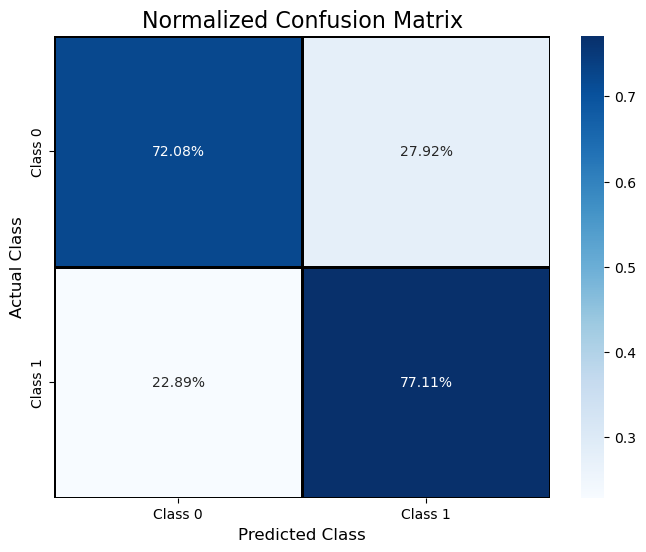

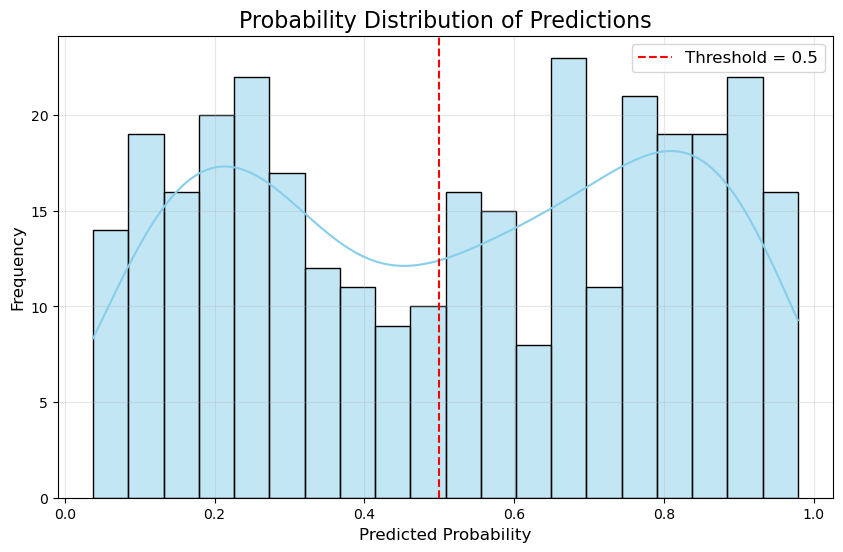

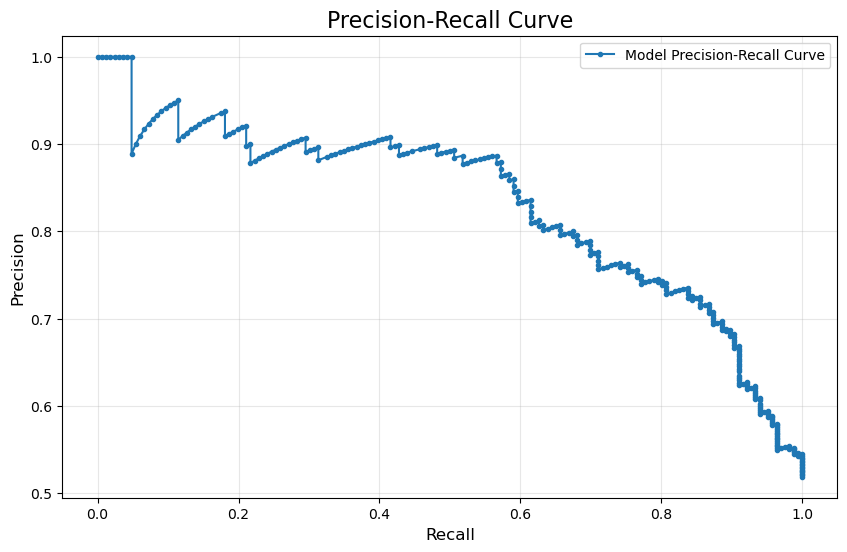

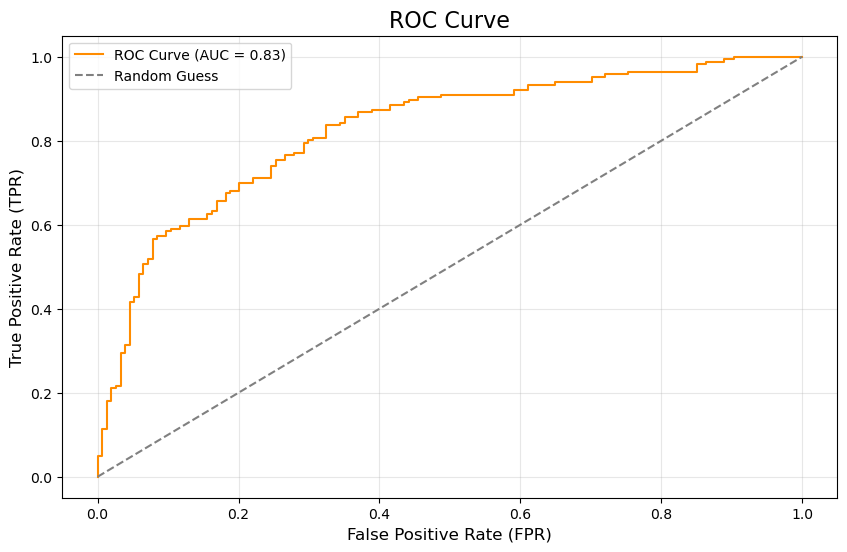

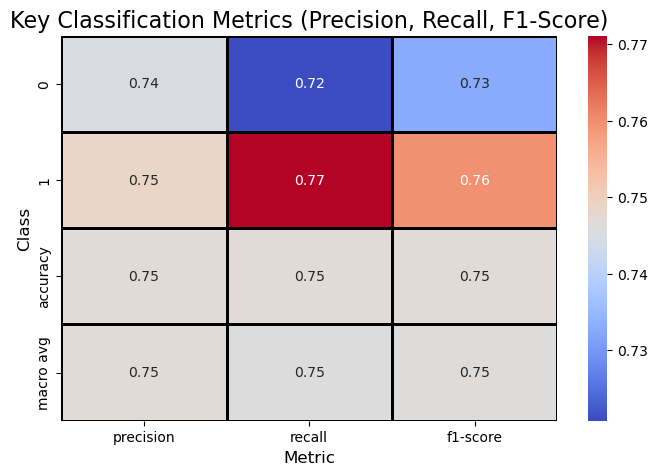

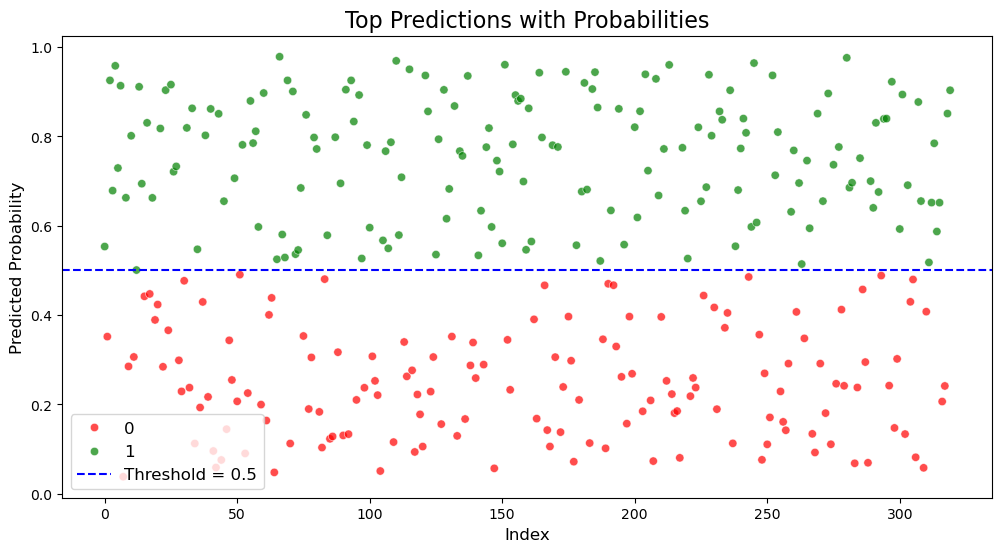

In [25]:
# --- Visualization 1: Normalized Confusion Matrix ---
# Create a normalized confusion matrix to visualize model performance
# The confusion matrix shows percentages of correct and incorrect classifications for each class
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, binary_predictions, normalize='true')  # Normalize to show percentages
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Blues', cbar=True, linewidths=1, linecolor="black", 
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Normalized Confusion Matrix", fontsize=16)  # Title of the plot
plt.xlabel("Predicted Class", fontsize=12)  # Label for the x-axis (Predicted classes)
plt.ylabel("Actual Class", fontsize=12)  # Label for the y-axis (True/Actual classes)
plt.xticks(fontsize=10)  # Set font size for x-axis ticks
plt.yticks(fontsize=10)  # Set font size for y-axis ticks
plt.show()

# --- Visualization 2: Probability Distribution for Predictions ---
# Visualize the distribution of predicted probabilities from the model
plt.figure(figsize=(10, 6))
sns.histplot(predictions.flatten(), bins=20, kde=True, color='skyblue')  # Histogram with KDE overlay
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')  # Vertical line for the decision threshold
plt.title("Probability Distribution of Predictions", fontsize=16)  # Title of the plot
plt.xlabel("Predicted Probability", fontsize=12)  # Label for the x-axis
plt.ylabel("Frequency", fontsize=12)  # Label for the y-axis
plt.legend(fontsize=12)  # Add a legend for the threshold line
plt.grid(alpha=0.3)  # Add a faint grid for better readability
plt.show()

# --- Visualization 3: Precision-Recall Curve ---
# Plot the Precision-Recall curve to evaluate the trade-off between precision and recall
precision, recall, _ = precision_recall_curve(y_test, predictions)  # Calculate precision and recall values
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Model Precision-Recall Curve')  # Plot recall vs. precision
plt.title("Precision-Recall Curve", fontsize=16)  # Title of the plot
plt.xlabel("Recall", fontsize=12)  # Label for the x-axis
plt.ylabel("Precision", fontsize=12)  # Label for the y-axis
plt.grid(alpha=0.3)  # Add a faint grid for better readability
plt.legend(fontsize=10)  # Add a legend for the curve
plt.show()

# --- Visualization 4: ROC Curve ---
# Plot the Receiver Operating Characteristic (ROC) curve
fpr, tpr, _ = roc_curve(y_test, predictions)  # Calculate false positive and true positive rates
roc_auc = auc(fpr, tpr)  # Compute the area under the curve (AUC)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange')  # Plot the ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")  # Baseline for random predictions
plt.title("ROC Curve", fontsize=16)  # Title of the plot
plt.xlabel("False Positive Rate (FPR)", fontsize=12)  # Label for the x-axis
plt.ylabel("True Positive Rate (TPR)", fontsize=12)  # Label for the y-axis
plt.legend(fontsize=10)  # Add a legend for the curve and baseline
plt.grid(alpha=0.3)  # Add a faint grid for better readability
plt.show()

# --- Visualization 5: Key Classification Metrics ---
# Visualize key classification metrics (Precision, Recall, F1-Score) as a heatmap
report_df = pd.DataFrame(classification_report(y_test, binary_predictions, output_dict=True)).transpose()  # Convert classification report to DataFrame
metrics_df = report_df[["precision", "recall", "f1-score"]].iloc[:-1]  # Exclude averages to focus on class-specific metrics
plt.figure(figsize=(8, 5))
sns.heatmap(metrics_df, annot=True, fmt='.2f', cmap='coolwarm', linewidths=1, linecolor='black')  # Heatmap with annotations
plt.title("Key Classification Metrics (Precision, Recall, F1-Score)", fontsize=16)  # Title of the plot
plt.xlabel("Metric", fontsize=12)  # Label for the x-axis
plt.ylabel("Class", fontsize=12)  # Label for the y-axis
plt.xticks(fontsize=10)  # Set font size for x-axis ticks
plt.yticks(fontsize=10)  # Set font size for y-axis ticks
plt.show()

# --- Visualization 6: Top Predictions for Exploration ---
# Scatter plot showing probabilities with their classification labels
plt.figure(figsize=(12, 6))
sns.scatterplot(x=range(len(predictions_df)), y=predictions_df["Probability"], hue=predictions_df["Prediction"], 
                palette={0: 'red', 1: 'green'}, alpha=0.7)  # Color by binary prediction
plt.axhline(0.5, color='blue', linestyle='--', label='Threshold = 0.5')  # Horizontal line for threshold
plt.title("Top Predictions with Probabilities", fontsize=16)  # Title of the plot
plt.xlabel("Index", fontsize=12)  # Label for the x-axis
plt.ylabel("Predicted Probability", fontsize=12)  # Label for the y-axis
plt.legend(fontsize=12)  # Add a legend for the threshold line
plt.show()


# Model Performance Review and Business Insights

## Purpose of the Model
The classification model was developed to predict whether a borrower is likely to **repay their student loan (Class 1)** or **default on their loan (Class 0)**. By providing insights into repayment behavior, the model enables businesses to better evaluate risk and offer tailored interest rates or lending options, thereby improving financial outcomes for both the lender and the borrower.

---

## Key Findings

### 1. Loan Repayment Predictions (Confusion Matrix)
- The model accurately identifies borrowers likely to repay their loans in **77.11%** of cases and correctly predicts loan defaults in **72.08%** of cases.  
- However, **22.89% of repayers** are misclassified as defaulters, and **27.92% of defaulters** are misclassified as repayers.  
- **Business Insight**: Misclassification can result in missed lending opportunities for creditworthy borrowers or increased financial risk by approving loans for high-risk individuals. These rates are acceptable but could be further improved with additional features or fine-tuning.

---

### 2. Prediction Confidence (Probability Distribution)
- The model produces a range of probabilities indicating the likelihood of repayment. While many predictions are confidently close to 0 (default) or 1 (repayment), several probabilities cluster near the decision threshold of 0.5.
- **Business Insight**: Borrowers with probabilities near the threshold could represent borderline cases where additional due diligence, such as reviewing more detailed credit history or income data, could reduce uncertainty and improve decision-making.

---

### 3. Model Discrimination Power (ROC Curve and AUC)
- The **ROC Curve** demonstrates strong performance, with an **AUC of 0.83**, indicating the model effectively distinguishes between borrowers who are likely to repay and those likely to default.
- **Business Insight**: This performance metric shows that the model can reliably support risk evaluation processes, helping businesses make better-informed lending decisions and optimize loan approval strategies.

---

### 4. Trade-Off Between Precision and Recall (Precision-Recall Curve)
- The **Precision-Recall Curve** highlights the balance between correctly identifying repayers (precision) and ensuring most repayers are captured (recall). The model maintains strong precision while achieving high recall across most thresholds.
- **Business Insight**: This balance ensures the model minimizes false positives (approving loans for borrowers unlikely to repay) while maximizing true positives (identifying those who will repay), supporting profitability by balancing risk and opportunity.

---

### 5. Overall Model Metrics (Key Metrics Heatmap)
- **Class 0 (Loan Default)**:
  - **Precision**: 0.74 – When the model predicts a default, it is correct 74% of the time.
  - **Recall**: 0.72 – The model identifies 72% of actual defaulters.
- **Class 1 (Loan Repayment)**:
  - **Precision**: 0.75 – When the model predicts repayment, it is correct 75% of the time.
  - **Recall**: 0.77 – The model captures 77% of actual repayers.
- **Business Insight**: These metrics indicate a strong and balanced model performance, which supports reliable decision-making in loan approval processes.

---

### 6. Visualization of Predictions (Top Predictions Scatterplot)
- The scatterplot reveals how borrowers are classified based on their repayment probabilities, with a clear separation between predicted defaulters and repayers. However, some cases near the 0.5 threshold could benefit from additional data to improve classification accuracy.
- **Business Insight**: These borderline cases highlight opportunities for deeper risk assessments and customized strategies, such as offering conditional approvals or alternative loan terms.

---

## Business Relevance and Actionable Takeaways
1. **Enhanced Risk Assessment**: The model’s ability to predict repayment likelihood allows lenders to fine-tune their risk models, ensuring more precise interest rates and loan terms based on borrower profiles.
2. **Profitability and Cost Reduction**: By minimizing false approvals (defaulters misclassified as repayers), the model helps avoid bad loans, reducing financial losses. Similarly, by minimizing false rejections (repayers misclassified as defaulters), it ensures lenders do not miss out on profitable customers.
3. **Optimizing Lending Strategies**: The model can be used to segment borrowers into low, medium, and high-risk categories. High-risk borrowers may be offered alternative loan terms or additional support, while low-risk borrowers could benefit from competitive rates.
4. **Future Improvements**: Incorporating additional features such as post-graduation income, job stability, or industry-specific earning potential could improve the model’s accuracy and make it even more aligned with business goals.

**Conclusion**: This classification model provides actionable insights into student loan repayment behavior, equipping businesses with a reliable tool to balance financial risks and opportunities. By continuously refining the model and leveraging its predictions, lenders can drive better business outcomes while supporting borrowers effectively.
